In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.graphics.tsaplots as sgt

In [21]:
data = pd.read_csv(r'index2018.csv')
data_copy = data.copy()
data_copy.date = pd.to_datetime(data_copy.date,dayfirst = True)
data_copy.set_index('date',inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')

In [22]:
data_copy['market_value'] = data_copy.ftse

In [23]:
data_copy.drop(['spx','dax','ftse','nikkei'],axis = 1,inplace = True)
train_size = int(len(data_copy)*0.8)
train_data,test_data = data_copy.iloc[:train_size],data_copy.iloc[train_size:]

In [24]:
data_copy['returns'] = data_copy.market_value.pct_change(1).mul(100)

### Fitting a simple ARMA model

In [25]:
arma_lag_1 = ARMA(data_copy.returns[1:],order = (1,1))

In [26]:
arma_model_lag_1 = arma_lag_1.fit()

In [27]:
arma_model_lag_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 1)   Log Likelihood               -9582.339
Method:                       css-mle   S.D. of innovations              1.114
Date:                Tue, 04 Aug 2020   AIC                          19172.679
Time:                        14:09:12   BIC                          19199.657
Sample:                    01-10-1994   HQIC                         19182.026
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.753      0.080      -0.002       0.040
ar.L1.returns     0.8177      0.063     12.964      0.000       0.694       0.941
ma.L1.returns    -0.8593      0.056    -15.284      0.000      -0.970      -0.749
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2229           +0.0000j            1.2229            0.0000
MA.1            1.1637           +0.0000j            1.1637            0.0000
-----------------------------------------------------------------------------
"""

#### To find the corrent AR and MA compoenents look into the ACF and PACF plots and identify the lag values which are significant. And then work from there.

In [28]:
arma_higher_lag_model = ARMA(data_copy.returns[1:],order = (8,6))

In [29]:
arma_higher_lag_model_fit = arma_higher_lag_model.fit()

In [30]:
arma_higher_lag_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(8, 6)   Log Likelihood               -9551.325
Method:                       css-mle   S.D. of innovations              1.108
Date:                Tue, 04 Aug 2020   AIC                          19134.651
Time:                        14:11:11   BIC                          19242.562
Sample:                    01-10-1994   HQIC                         19172.040
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.010      1.855      0.064      -0.001       0.039
ar.L1.returns    -1.0868      0.270     -4.031      0.000      -1.615      -0.558
ar.L2.returns    -0.4680      0.230     -2.032      0.042      -0.919      -0.017
ar.L3.returns    -0.1799      0.173     -1.043      0.297      -0.518       0.158
ar.L4.returns     0.3807      0.131      2.909      0.004       0.124       0.637
ar.L5.returns     0.9950      0.173      5.760      0.000       0.656       1.334
ar.L6.returns     0.3520      0.201      1.749      0.080      -0.042       0.746
ar.L7.returns     0.0422      0.031      1.381      0.167      -0.018       0.102
ar.L8.returns     0.0589      0.018      3.346      0.001       0.024       0.093
ma.L1.returns     1.0672      0.270      3.960      0.000       0.539       1.596
ma.L2.returns     0.3987      0.224      1.777      0.076      -0.041       0.838
ma.L3.returns     0.0505      0.157      0.322      0.747      -0.256       0.357
ma.L4.returns    -0.4464      0.113     -3.935      0.000      -0.669      -0.224
ma.L5.returns    -1.0317      0.172     -6.013      0.000      -1.368      -0.695
ma.L6.returns    -0.3739      0.204     -1.832      0.067      -0.774       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1008           -0.0000j            1.1008           -0.0000
AR.2            0.0911           -1.0253j            1.0294           -0.2359
AR.3            0.0911           +1.0253j            1.0294            0.2359
AR.4           -0.9105           -0.4646j            1.0222           -0.4249
AR.5           -0.9105           +0.4646j            1.0222            0.4249
AR.6           -1.6625           -0.0000j            1.6625           -0.5000
AR.7            0.7422           -2.7979j            2.8947           -0.2087
AR.8            0.7422           +2.7979j            2.8947            0.2087
MA.1            1.0766           -0.0000j            1.0766           -0.0000
MA.2            0.1030           -1.0287j            1.0338           -0.2341
MA.3            0.1030           +1.0287j            1.0338            0.2341
MA.4           -0.9086           -0.4682j            1.0221           -0.4243
MA.5           -0.9086           +0.4682j            1.0221            0.4243
MA.6           -2.2248           -0.0000j            2.2248           -0.5000
-----------------------------------------------------------------------------
"""

In [33]:
arma_higher_lag_model_3_3 = ARMA(data_copy.returns[1:],order = (3,3))

In [34]:
arma_higher_lag_model_3_3_fit = arma_higher_lag_model_3_3.fit()

In [35]:
arma_higher_lag_model_3_3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 3)   Log Likelihood               -9564.828
Method:                       css-mle   S.D. of innovations              1.111
Date:                Tue, 04 Aug 2020   AIC                          19145.656
Time:                        14:12:20   BIC                          19199.612
Sample:                    01-10-1994   HQIC                         19164.351
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.664      0.096      -0.003       0.041
ar.L1.returns    -0.1278      0.106     -1.202      0.229      -0.336       0.081
ar.L2.returns    -0.2079      0.097     -2.154      0.031      -0.397      -0.019
ar.L3.returns     0.5021      0.131      3.835      0.000       0.245       0.759
ma.L1.returns     0.1126      0.102      1.105      0.269      -0.087       0.312
ma.L2.returns     0.1461      0.094      1.556      0.120      -0.038       0.330
ma.L3.returns    -0.5788      0.121     -4.799      0.000      -0.815      -0.342
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5363           -1.0258j            1.1575           -0.3267
AR.2           -0.5363           +1.0258j            1.1575            0.3267
AR.3            1.4865           -0.0000j            1.4865           -0.0000
MA.1           -0.5477           -0.9909j            1.1322           -0.3304
MA.2           -0.5477           +0.9909j            1.1322            0.3304
MA.3            1.3478           -0.0000j            1.3478           -0.0000
-----------------------------------------------------------------------------
"""

In [39]:
arma_higher_lag_model_3_2 = ARMA(data_copy.returns[1:],order = (3,2))

In [40]:
arma_higher_lag_model_3_2_fit = arma_higher_lag_model_3_2.fit()

In [41]:
arma_higher_lag_model_3_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 2)   Log Likelihood               -9568.878
Method:                       css-mle   S.D. of innovations              1.112
Date:                Tue, 04 Aug 2020   AIC                          19151.755
Time:                        14:21:55   BIC                          19198.967
Sample:                    01-10-1994   HQIC                         19168.113
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.472      0.141      -0.006       0.044
ar.L1.returns    -0.6818      0.113     -6.025      0.000      -0.904      -0.460
ar.L2.returns    -0.3567      0.157     -2.270      0.023      -0.665      -0.049
ar.L3.returns    -0.0965      0.013     -7.588      0.000      -0.121      -0.072
ma.L1.returns     0.6648      0.114      5.853      0.000       0.442       0.887
ma.L2.returns     0.2988      0.159      1.884      0.060      -0.012       0.610
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5864           -1.9396j            2.0263           -0.2967
AR.2           -0.5864           +1.9396j            2.0263            0.2967
AR.3           -2.5241           -0.0000j            2.5241           -0.5000
MA.1           -1.1125           -1.4524j            1.8295           -0.3540
MA.2           -1.1125           +1.4524j            1.8295            0.3540
-----------------------------------------------------------------------------
"""

### Analysing residuals

In [44]:
data_copy['residuals'] = arma_higher_lag_model_3_2_fit.resid[1:]

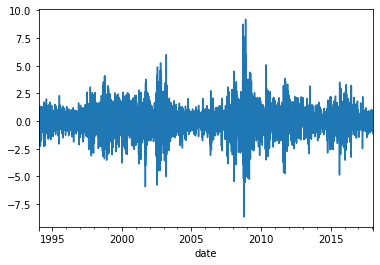

In [45]:
data_copy.residuals.plot()

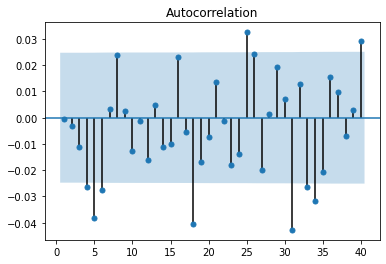

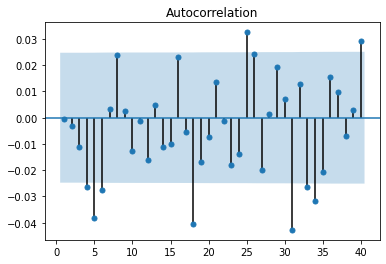

In [48]:
sgt.plot_acf(data_copy.residuals[2:],zero = False,lags = 40)